# **Music Recommendation System**

## **Problem Definition**

### **The Context**

 - With the advent of technology, societies have become more efficient with their lives. At the same
time, however, individual human lives have also become more fast-paced and distracted, leaving
little time to explore artistic pursuits. Also, technology has made significant advancements in the
ability to coexist with art and general entertainment. It has in fact made it easier for humans with a
shortage of time to find and consume good content. Almost every internet-based company's revenue relies on the time consumers spend on its platform. These companies need to be able to figure out what kind of content is needed in order to increase
customer time spent and make their experience better. Therefore, one of the key challenges for
these companies is figuring out what kind of content their customers are most likely to consume.
Spotify is one such audio content provider with a huge market base across the world. With the
ever-increasing volume of songs becoming available on the Internet, searching for songs of interest
has become a tedious task in itself. However, Spotify has grown significantly in the market because
of its ability to recommend the ‘best’ next song to each and every customer based on a huge
preference database gathered over time - millions of customers and billions of songs. This is done
by using smart recommendation systems that can recommend songs based on users’ likes/dislikes

### **The objective:**

 - Build a recommendation system to propose the top 10 songs for a user based on the likelihood of listening. You have a collection of labeled data of which songs are being playes by users and the number of times each songs is played. Altough we do not have a song based rating, we can consider that more popular/liked songs will be played multiple times.

## **The key questions:**

- For a given user, based on the list of songs that had been played by that user, lookup for 10 recommended songs that are likely to be liked by the user and that had not been considered before.

### **The problem formulation:**

- Use Data Science techniques to identify similar users based on which type of music they listen to. Also, identify types of music that a given user prefers and gather songs of the same type which will be likely to of the users taste.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [2]:
# Mounting the drive if run in google colab
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [2]:
# Importing the datasets
#count_df = pd.read_csv('/content/drive/MyDrive/MIT-PE-Data_Science/Capstone/count_data.csv')
#song_df = pd.read_csv('/content/drive/MyDrive/MIT-PE-Data_Science/Capstone/song_data.csv')
count_df = pd.read_csv('count_data.csv')
song_df = pd.read_csv('song_data.csv')

In [3]:
print(song_df.shape)
print(count_df.shape)

(1000000, 5)
(2000000, 4)


### **Understanding the data by viewing a few observations**

In [4]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [5]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [6]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [7]:
count_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2000000.0,999999.500000,577350.413528,0.0,499999.75,999999.5,1499999.25,1999999.0
play_count,2000000.0,3.045485,6.579720,1.0,1.00,1.0,3.00,2213.0


In [8]:
count_df.value_counts()

Unnamed: 0  user_id                                   song_id             play_count
0           b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995  1             1
1333343     e53b230b0c4e035fec86a2a47442fc3db4a98ca5  SOUOSVR12A8C137061  2             1
1333341     e53b230b0c4e035fec86a2a47442fc3db4a98ca5  SOUFPNI12A8C142D19  5             1
1333340     e53b230b0c4e035fec86a2a47442fc3db4a98ca5  SOUAWVS12A6D4F606C  14            1
1333339     e53b230b0c4e035fec86a2a47442fc3db4a98ca5  SOTCLIO12AB0180F26  2             1
                                                                                       ..
666662      810bfc92d58786310e798c1229c701ecae84716e  SORJICW12A8C13640D  3             1
666661      810bfc92d58786310e798c1229c701ecae84716e  SOQJHUW12AB0188A24  6             1
666660      810bfc92d58786310e798c1229c701ecae84716e  SOQGVCS12AF72A078D  9             1
666659      810bfc92d58786310e798c1229c701ecae84716e  SOQARNI12A8C141964  5             1
1999999     d8b

In [9]:
count_df.nunique()

Unnamed: 0    2000000
user_id         76353
song_id         10000
play_count        295
dtype: int64

In [10]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [11]:
song_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1000000.0,1030.325652,998.745002,0.0,0.0,1969.0,2002.0,2011.0


In [12]:
song_df.value_counts()

song_id             title                                    release                           artist_name               year
SOQNMCD12A8C1383D4  Come On Home                             Franz Ferdinand                   Franz Ferdinand           2004    3
SOEGQML12AF7299C84  California Callin'                       7                                 Enrique Iglesias          2003    3
SOXHYWX12A8C142CE8  Real World                               When The World Comes Down         The All-American Rejects  2008    3
SOEHQBQ12A6D4F9EA9  Before Three                             The Cure                          The Cure                  2004    3
SOZBJBH12A8151BD4E  Fade Together                            You Could Have It So Much Better  Franz Ferdinand           2005    3
                                                                                                                                ..
SOHXKYM12AF72AA2F4  3 Am                                     Deus Ex Machina            

In [13]:
song_df.nunique()

song_id        999056
title          702428
release        149288
artist_name     72665
year               90
dtype: int64

#### **Observations and Insights:**
- We have 1 million songs listed, but just 999,056 unique ones, that means there we expect some duplicated song_ids.
- For count_df, we have 2 million entries, with just 10,000 unique song_ids and 76,353 unique user_ids.
- There are 990K songs that have not been played by any user in the count_df database.
- play_count goes from 1 to 2,213, with a mean of 3.05 and a std of 6.58. We see that most of the play_count values will be below 10.
- The only relevalt columns that are integer type are year and play_count. All the rest are of type string (obj).
- user_id and song_id look like encripted values of type string. In this case we can convert them into 64 integer values. The 1 million songs and 76K users can fit into this type of integer.

In [14]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")

In [15]:
df.head()

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [16]:
df.shape

(2000000, 8)

In [17]:
# Drop the column 'Unnamed: 0'
df = df.drop(['Unnamed: 0'],axis=1)
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


In [18]:
df_copy=df.copy(deep = True)

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [19]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

In [20]:
data=df[['user_id','song_id']].apply(LabelEncoder().fit_transform)

In [21]:
df['user_id'] = data['user_id']
df['song_id'] = data['song_id']
df

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,64590,3660,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,64590,3736,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,64590,3744,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,64590,3893,1,Up,My Worlds,Justin Bieber,2010


In [22]:
df.value_counts(['play_count'])

play_count
1             1138433
2              313043
3              142933
5               93136
4               82569
               ...   
270                 1
260                 1
259                 1
255                 1
2213                1
Length: 295, dtype: int64

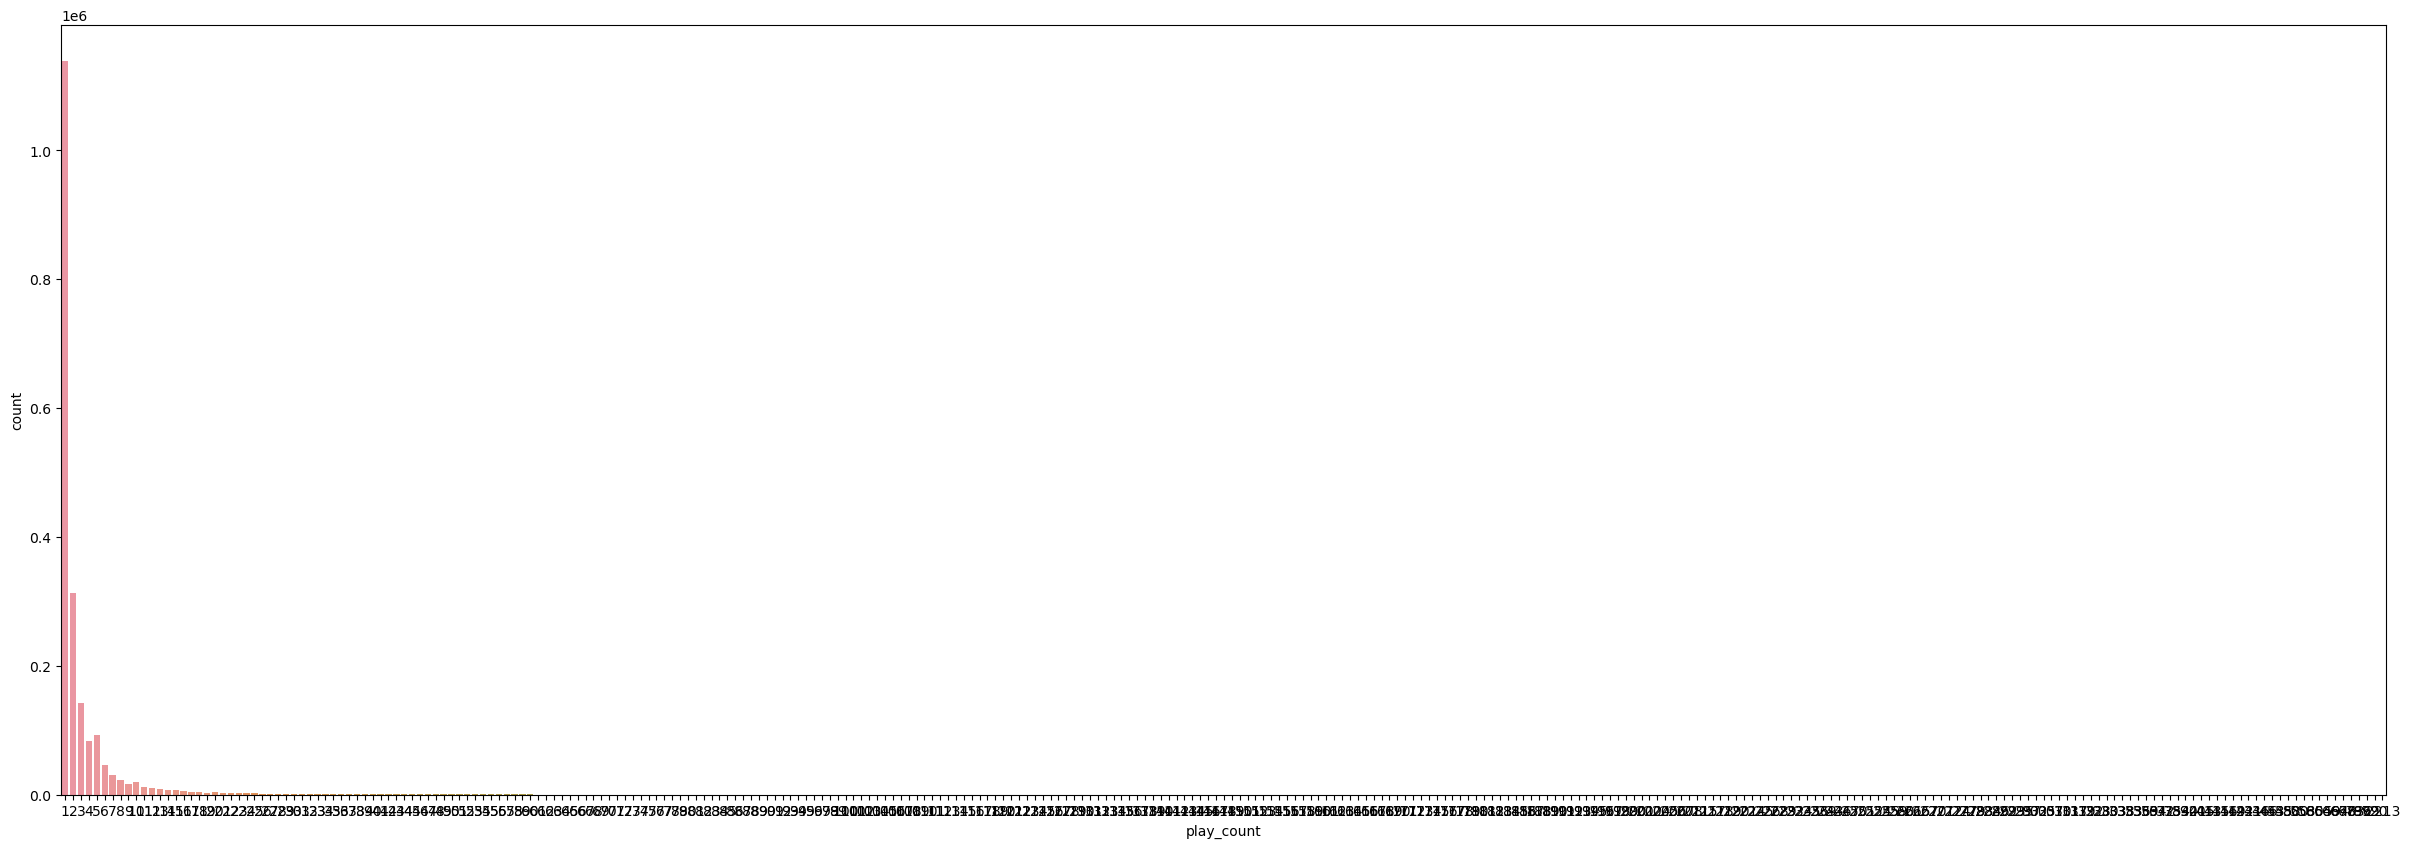

In [23]:
# Set the figure size
plt.figure(figsize = (30, 10))
sns.countplot(data=df, x='play_count');

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [24]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [25]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [26]:
df.value_counts(['user_id'])

user_id
32542      711
75144      643
23297      556
10807      540
7834       533
          ... 
31296       90
72325       90
38244       90
38906       90
76347       90
Length: 3156, dtype: int64

In [27]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [28]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [29]:
df_final.value_counts(['song_id'])

song_id
352        1002
2220        928
8582        838
5531        817
7416        754
           ... 
1767        120
2217        120
8973        120
6959        120
3752        120
Length: 563, dtype: int64

In [30]:
df_final.value_counts(['play_count'])

play_count
1             72473
2             23890
3             10774
4              5874
5              4865
              ...  
114               1
115               1
117               1
118               1
405               1
Length: 126, dtype: int64

In [31]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]

In [32]:
df_final['play_count'].value_counts()

1    72473
2    23890
3    10774
4     5874
5     4865
Name: play_count, dtype: int64

In [33]:
df_final['play_count'].value_counts(normalize=True)

1    0.614824
2    0.202671
3    0.091401
4    0.049832
5    0.041272
Name: play_count, dtype: float64

In [34]:
# Check the shape of the data
df_final.shape

(117876, 7)

#### **Observations and Insights:**
- We have reduce the number of observations to a more computable friendly size by filtering out songs that do not have a large number of plays. as well as users that have not played a large number of songs. Otherwise the user-song interaction matrices would be too large for computing.
- At the same time, we have dropped records with number of plays more than 5.

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [35]:
# Display total number of unique user_id
df_final.nunique()

user_id        3155
song_id         563
play_count        5
title           561
release         369
artist_name     232
year             37
dtype: int64

Total number of unique song id

In [36]:
# Display total number of unique song_id
df_final['song_id'].nunique()

563

Total number of unique artists

In [37]:
# Display total number of unique artists
df_final['artist_name'].nunique()

232

#### **Observations and Insights:**
- Instead of considering 1 million songs and 76K users, we now have a table with 3,155 users and 563 songs that have been played up to 5 times each.
- The size of the user-song interaction matrix is not manegable for modeling.


## User - Song interaction matrix

Let's explore the User-Product matrix:

In [38]:
tmp = df_final.copy()
dtf_users = tmp.pivot_table(index="user_id", columns="song_id", values="play_count")
missing_cols = list(set(df_final["song_id"].unique()) - set(dtf_users.columns))
for col in missing_cols:
    dtf_users[col] = np.nan
dtf_users = dtf_users[sorted(dtf_users.columns)]
dtf_users

song_id,21,22,52,62,93,97,118,122,134,139,...,9767,9771,9847,9913,9931,9939,9942,9960,9981,9989
user_id,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
84,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76300,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
76307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


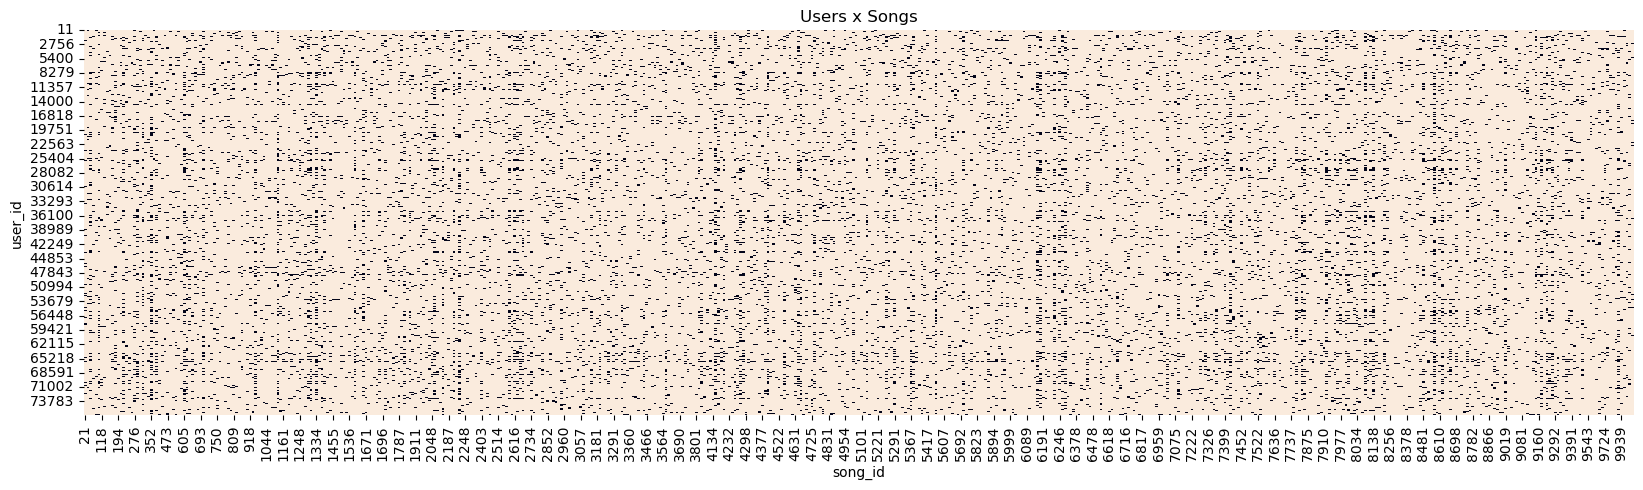

In [39]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(dtf_users.isnull(), vmin=0, vmax=1, cbar=False, ax=ax).set_title("Users x Songs")
plt.show()

##### This shows that this is a Sparse Matrix

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [40]:
df_final['song_id'].value_counts()

8582    751
352     748
2220    713
1118    662
4152    652
       ... 
9048    103
6450    102
990     101
4831     97
8324     96
Name: song_id, Length: 563, dtype: int64

In [41]:
top_10=df_final['song_id'].value_counts().index.tolist()[:10]
top_10

[8582, 352, 2220, 1118, 4152, 5531, 4448, 6189, 6293, 1334]

In [42]:
for i in top_10:
    print(df_final[df_final['song_id']==i]['title'].tolist()[0])

Use Somebody
Dog Days Are Over (Radio Edit)
Sehr kosmisch
Clocks
The Scientist
Secrets
Fireflies
Creep (Explicit)
Yellow
Hey_ Soul Sister


Most interacted users

In [43]:
df_final['user_id'].value_counts()

61472    243
15733    227
37049    202
9570     184
23337    177
        ... 
19776      1
45476      1
17961      1
14439      1
10412      1
Name: user_id, Length: 3155, dtype: int64

#### **Observations and Insights:**
- The most played song is "Use Somebody", played by 751 users.
- User with id 61472 has played 243 songs

Songs played in a year

In [44]:
df_final

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
...,...,...,...,...,...,...,...
1999734,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,0
1999736,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997
1999745,47786,9351,2,The Police And The Private,Live It Out,Metric,2005
1999755,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006


In [45]:
# Find out the number of songs played in a year
  # Hint: Use groupby function on the 'year' column

count_songs = df_final.groupby('year').count()['title']
count_songs.sort_values(ascending=False)

year
0       20649
2009    16351
2008    14031
2007    13750
2003     7928
2006     7592
2005     5376
2002     5135
2000     4834
2010     4087
2001     2805
2004     2314
1999     1652
1997     1439
1991     1338
1993     1214
1986     1105
1992      849
1974      583
1988      569
1994      504
1996      502
1976      478
1990      373
1987      336
1973      270
1969      238
1980      234
1979      220
1995      206
1975      173
1981      144
1971      133
1982      126
1978      119
1983      110
1970      109
Name: title, dtype: int64

In [46]:
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace = True)
count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


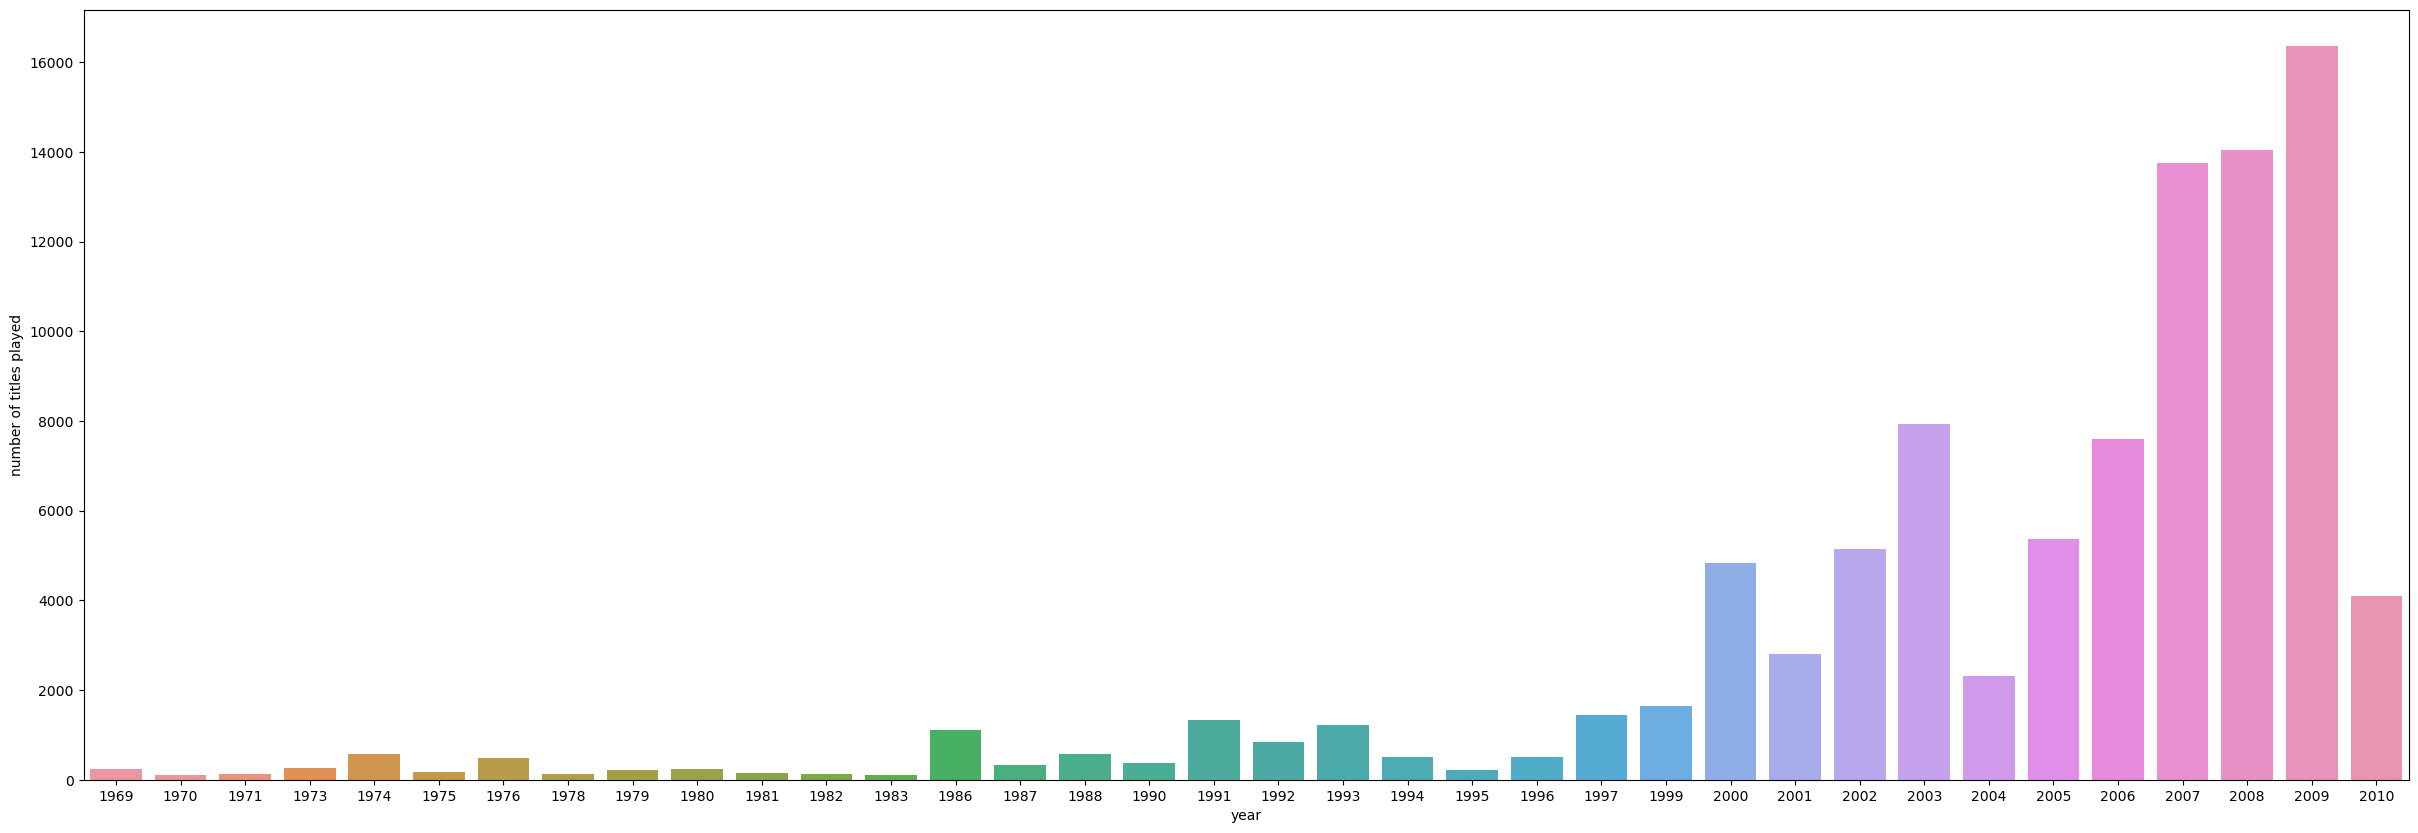

In [47]:
# Create a barplot plot with y label as "number of titles played" and x -axis year
# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played')

# Show the plot
plt.show()

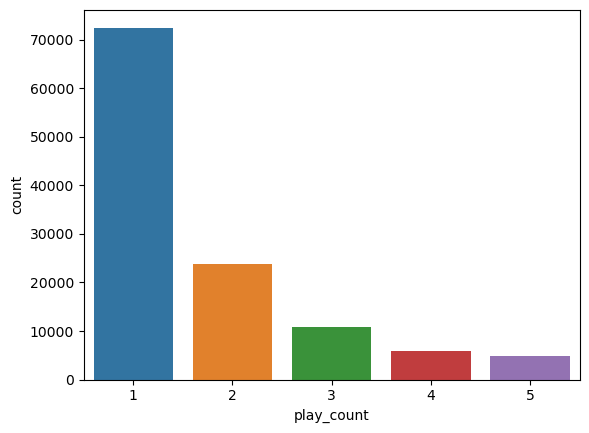

In [48]:
sns.countplot(data=df_final, x='play_count');

In [49]:
df_final['play_count'].value_counts(normalize=True)

1    0.614824
2    0.202671
3    0.091401
4    0.049832
5    0.041272
Name: play_count, dtype: float64

#### **Observations and Insights:** #
- **We will use play_count as a ratings measure for a given song.**
- Large number of songs played are from 2006-2010
- We see that around 80% of the "ratings", or number of times played is up to 2 times.

**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [50]:
df_final.head(5)

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [51]:
# Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count']
average_count

song_id
21      1.622642
22      1.492424
52      1.729216
62      1.728070
93      1.452174
          ...   
9939    1.683983
9942    2.486667
9960    1.597122
9981    1.921053
9989    1.333333
Name: play_count, Length: 563, dtype: float64

In [52]:
# Calculating the frequency a song is played
play_frequency = df_final.groupby('song_id').count()['play_count']
play_frequency

song_id
21      265
22      132
52      421
62      114
93      115
       ... 
9939    231
9942    150
9960    139
9981    152
9989    120
Name: play_count, Length: 563, dtype: int64

In [53]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_frequency})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


In [54]:
final_play['play_freq'].value_counts()

120    13
122    10
123    10
126    10
121     9
       ..
190     1
246     1
180     1
347     1
544     1
Name: play_freq, Length: 238, dtype: int64

Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [55]:
# Build the function to find top n songs

def top_n_songs(data, n, min_interaction=100):

    # Finding songs with minimum number of interactions
    recommendations = data[data['play_freq'] > min_interaction]

    # Sorting values w.r.t. average rating
    recommendations = recommendations.sort_values(by='avg_count', ascending=False)

    return recommendations.index[:n]

# use top_n_songs to retrieve the list of n top song titles usinf final_play and df_final DataFrames.
def top_n_song_titles(n, min_interaction=100):

    res = top_n_songs(final_play, n, min_interaction)

    # Name of the songs
    list_of_songs = []
    for i in res:
        list_of_songs.append(df_final[df_final['song_id']== i ]['title'].unique()[0])
    return list_of_songs


In [56]:
#top 10 songs with a min 100 interactions
top_n_song_titles(10)

['Victoria (LP Version)',
 'Brave The Elements',
 'Greece 2000',
 'Secrets',
 'Transparency',
 'Video Killed The Radio Star',
 'Sehr kosmisch',
 'Luvstruck',
 "You're The One",
 'Dog Days Are Over (Radio Edit)']

In [57]:
#top 10 songs with a min 10 interactions
top_n_song_titles(10,10)

['Victoria (LP Version)',
 'The Big Gundown',
 'Brave The Elements',
 'Greece 2000',
 'Secrets',
 'Transparency',
 'Video Killed The Radio Star',
 'Sehr kosmisch',
 'Luvstruck',
 "You're The One"]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
# !pip install surprise

In [58]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering


### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [59]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
# Note the use of testset which needs to be defined before calling this function.

def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    F_1 =  round((2*precision*recall)/(precision+recall), 3) # Formula to compute the F-1 score

    # Formula to compute the F-1 score
    print('F_1 score: ', F_1)

    return [accuracy.rmse(predictions), precision, recall, F_1]

# function to store the precision_recall_at_k results for the different models
def Add_to_Model_Stats(model_stats, column_name, data):
    if type(model_stats)==int:
        return pd.DataFrame({'Model Stats': ['RMSE','Precision','Recall','F_1'], column_name: data})
    else:
        model_stats[column_name] = data
        return model_stats

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

In [60]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale=(0,5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42)

**Think About It:** How changing the test size would change the results and outputs?

In [61]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine', 'user_based': True}

In [62]:
# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

In [63]:
# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

In [250]:
# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
pr_at_k = precision_recall_at_k(sim_user_user);

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504
RMSE: 1.0878


In [ ]:
precision_recall_at_k(sim_user_user, 10, 2);

In [65]:
model_stats = Add_to_Model_Stats(0, 'Similarity KNN User-User', pr_at_k)
model_stats.T

,0,1,2,3
Model Stats,RMSE,Precision,Recall,F_1
Similarity KNN User-User,1.087823,0.396,0.692,0.504


**Observations and Insights:**
- The RMSE is 1.087 which does not seem to be too high.
- Precision@k is 0.39 which is lower than the Recall@k (0.69). That means that we are recommending songs that are not as relevant.
- At precision 0.39, the model is not performning well enough.
- ( Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned))

In [66]:
df_final[df_final['user_id']==6958].sort_values(by='song_id')

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
206,6958,892,1,Bleeding Hearts,Hell Train,Soltero,0
209,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
213,6958,1480,1,Fast As I Can,Monday Morning Cold,Erin McKeown,2000
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
216,6958,1752,1,Gimme Sympathy,Gimme Sympathy,Metric,2009


In [67]:
top_n_songs(final_play,10).tolist()

[7224, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614, 352]

### Let's use: user_id=6958 with song_id 1671 and play_count=2, and same user_id with the never played song_id = 7224

In [68]:
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [69]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user
sim_user_user.predict(6958, 7224, verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 7224       r_ui = None   est = 3.14   {'actual_k': 32, 'was_impossible': False}


Prediction(uid=6958, iid=7224, r_ui=None, est=3.1411469741806526, details={'actual_k': 32, 'was_impossible': False})

**Observations and Insights:**
- For a user that has played a song 2 times, this model predicts a 1.8 "rating"
- For a user that has not played a song, this model predicts that it will play it 3.14 times.

Now, let's try to tune the model and see if we can improve the model performance.

In [70]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30],
              'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True],
                              "min_support": [2, 4]}
              }

In [71]:
# Performing 3-fold cross-validation to tune the hyperparameters
grid_obj = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

In [72]:
# Fitting the data
 # Use entire data for GridSearch
grid_obj.fit(data)

In [73]:
# Best RMSE score
grid_obj.best_score['rmse']

1.0471113458784396

In [74]:
# Combination of parameters that gave the best RMSE score
grid_obj.best_params['rmse']

{'k': 30,
 'min_k': 9,
 'sim_options': {'name': 'pearson_baseline',
  'user_based': True,
  'min_support': 2}}

In [75]:
# Train the best model found in above gridsearch

sim_options = {'name': 'pearson_baseline', 'user_based': True, 'min_support':2}

sim_user_user_optimized = KNNBasic(sim_options = sim_options, k =30, min_k = 9, random_state = 1, verbose = False)

sim_user_user_optimized.fit(trainset)

pr_at_k = precision_recall_at_k(sim_user_user_optimized);
model_stats = Add_to_Model_Stats(model_stats, 'Similarity KNN User Optimized', pr_at_k)
model_stats.T

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525
RMSE: 1.0521


,0,1,2,3
Model Stats,RMSE,Precision,Recall,F_1
Similarity KNN User-User,1.087823,0.396,0.692,0.504
Similarity KNN User Optimized,1.052074,0.413,0.721,0.525


**Observations and Insights:**
- With the optimized hyperparameters, we have reduce the RNSE to 1.05 from 1.08
- The precision@k increased to 0.41 and the recall also increased to 0.72 as well as F_1 score.

In [76]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [77]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 7224, verbose = True)

user: 6958       item: 7224       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid=6958, iid=7224, r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Observations and Insights:**
- For the user/song with play_count=2, this optimized model predicts 1.96 which is better than the not optimized model that gave 1.8.
- For the second case, now we predict that the "rating" would be 1.70, which is lower than the 3.14 as in the previous case.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [78]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, k=5)

[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [79]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended book ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')

    # Extracting those song ids which the user_id has not interacted with yet
    non_interacted_items = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the book id which user_id has not interacted with yet
    for song_id in non_interacted_items:

        # Predicting the play_count for those non interacted song ids by this user
        est = algo.predict(user_id, song_id).est

        # Appending the predicted ratings
        recommendations.append((song_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # Returning top n predicted ratings items for this user

In [80]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [82]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,5531,2.553335
1,317,2.518269
2,4954,2.406776
3,8635,2.396606
4,5943,2.390723


**Observations and Insights:**
- Using a similarity user-user model, we can provide a list of recommended songs, not played before for a given user.
- We are predicting that these songs will be played at least 2 times each.

### Correcting the play_counts and Ranking the above songs

In [83]:
final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


In [84]:

def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending=False)

  return ranked_songs


**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [85]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,5531,618,2.553335,2.513109
2,317,411,2.518269,2.468943
1,5943,423,2.390723,2.342101
3,4954,183,2.406776,2.332854
4,8635,155,2.396606,2.316284


**Observations and Insights:**
- We take into account the number of times a songs is played in order to correct the "rating".
- We substract 1/sqrt(freq_played) to penalize songs that are not played as often.

### Item Item Similarity-based collaborative filtering recommendation systems

In [86]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
sim_options = {'name': 'cosine', 'user_base': False}

# KNN algorithm is used to find desired similar items. Use random_state=1
sim_item_item = KNNBasic(sim_option = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10

pr_at_k = precision_recall_at_k(sim_item_item);
model_stats = Add_to_Model_Stats(model_stats, 'Similarity KNN Item-Item', pr_at_k)
model_stats.T

RMSE: 1.0626
Precision:  0.413
Recall:  0.608
F_1 score:  0.492
RMSE: 1.0626


,0,1,2,3
Model Stats,RMSE,Precision,Recall,F_1
Similarity KNN User-User,1.087823,0.396,0.692,0.504
Similarity KNN User Optimized,1.052074,0.413,0.721,0.525
Similarity KNN Item-Item,1.062595,0.413,0.608,0.492


**Observations and Insights:**
- For a similarity song-song base model, we are getting model stats lower than the user optimized model, but higher than the not optimized user-user model.

In [87]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.52   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.5210405508798759, details={'actual_k': 40, 'was_impossible': False})

In [88]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
df_final[df_final['song_id']!=1671].sort_values(by='user_id')

,user_id,song_id,play_count,title,release,artist_name,year
30872,11,5158,2,Thriller,The Essential Michael Jackson,Michael Jackson,1982
30902,11,8019,1,Gears,Gears,Future Rock,0
30911,11,8882,1,Every Little Thing She Does Is Magic,Every Breath You Take : The Classics,The Police,1981
800439,17,2514,1,Big Big Love (Fig .2),Antidotes,Foals,2008
800449,17,3360,1,Lullaby In Three/Four,Monday Morning Cold,Erin McKeown,0
...,...,...,...,...,...,...,...
501613,76342,7889,5,Make Love To Your Mind,Playlist: The Very Best Of Bill Withers,Bill Withers,1975
501621,76342,8494,2,Drops Of Jupiter,Drops Of Jupiter,Train,2001
501640,76342,9942,5,Greece 2000,Greece 2000,Three Drives,1997
501520,76342,93,1,I'm Still Breathing,One Of The Boys (iTunes Exclusive),Katy Perry,2008


In [89]:
sim_item_item.predict(76342, 1671, verbose = True)

user: 76342      item: 1671       r_ui = None   est = 1.95   {'actual_k': 6, 'was_impossible': False}


Prediction(uid=76342, iid=1671, r_ui=None, est=1.949868073878628, details={'actual_k': 6, 'was_impossible': False})

**Observations and Insights:**
- For user 6958, song 1671 we are predicting a value of 1.52 which is the lowest so far.

In [90]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30],
              'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False],
                              "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
grid_obj = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs = -1)

# Fitting the data
grid_obj.fit(data)


In [91]:
# Find the best RMSE score
print(grid_obj.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(grid_obj.best_params['rmse'])

1.0228488570386598
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [92]:
# Apply the best modle found in the grid search
sim_options = {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k=30, min_k = 6, random_state = 1, verbose=False)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

pr_at_k = precision_recall_at_k(sim_item_item_optimized);
model_stats = Add_to_Model_Stats(model_stats, 'Similarity KNN Item Optimized', pr_at_k)
model_stats.T

RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506
RMSE: 1.0328


,0,1,2,3
Model Stats,RMSE,Precision,Recall,F_1
Similarity KNN User-User,1.087823,0.396,0.692,0.504
Similarity KNN User Optimized,1.052074,0.413,0.721,0.525
Similarity KNN Item-Item,1.062595,0.413,0.608,0.492
Similarity KNN Item Optimized,1.03285,0.408,0.665,0.506


**Observations and Insights:**
- The optimized item-item model is given the lowest RMSE value so far, but the precision@k and recall is not as good as the optimized user-user model.

In [93]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [94]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.28   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2759946618244609, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**
- For the observed user/song case, we get a closer approximation of 1.96 to the actual 2 value

In [95]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k=5)

[124, 523, 173, 205, 65]

In [96]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [97]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [98]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
4,2342,111,2.653903,2.558987
2,5101,130,2.386577,2.298871
3,139,119,2.313727,2.222057
1,7519,168,2.270864,2.193712
0,8099,275,2.212702,2.152399


**Observations and Insights:**
- The song_id = 8099 is the most played so the penalization applied is small, but the number of times other songs are in the 111-168 which does not have a great effect in the adjusted rating.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [99]:
# Build baseline model using svd
svd = SVD(random_state = 1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
pr_at_k = precision_recall_at_k(svd);
model_stats = Add_to_Model_Stats(model_stats, 'SVD', pr_at_k)
model_stats.T

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498
RMSE: 1.0252


,0,1,2,3
Model Stats,RMSE,Precision,Recall,F_1
Similarity KNN User-User,1.087823,0.396,0.692,0.504
Similarity KNN User Optimized,1.052074,0.413,0.721,0.525
Similarity KNN Item-Item,1.062595,0.413,0.608,0.492
Similarity KNN Item Optimized,1.03285,0.408,0.665,0.506
SVD,1.025249,0.41,0.633,0.498


In [100]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [101]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [102]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30],
              'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
grid_obj = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
grid_obj.fit(data)


In [103]:
# Best RMSE score
print(grid_obj.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(grid_obj.best_params['rmse'])

1.012017274919186
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [104]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all=0.01, reg_all=0.2, random_state=1)

# Train the algorithm on the trainset
svd_optimized = svd_optimized.fit(trainset)

pr_at_k = precision_recall_at_k(svd_optimized);
model_stats = Add_to_Model_Stats(model_stats, 'SVD Optimized', pr_at_k)
model_stats.T

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502
RMSE: 1.0141


,0,1,2,3
Model Stats,RMSE,Precision,Recall,F_1
Similarity KNN User-User,1.087823,0.396,0.692,0.504
Similarity KNN User Optimized,1.052074,0.413,0.721,0.525
Similarity KNN Item-Item,1.062595,0.413,0.608,0.492
Similarity KNN Item Optimized,1.03285,0.408,0.665,0.506
SVD,1.025249,0.41,0.633,0.498
SVD Optimized,1.014134,0.415,0.635,0.502


**Observations and Insights:**
- Using a matrix based model, we get an optimized SVD model with the lowest RMSE so far. The precision@k is almost as good as the optimized user-user and item-item models.

In [105]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125098, details={'was_impossible': False})

In [106]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4425484461176483, details={'was_impossible': False})

**Observations and Insights:**
- For user/song with an observer rating of 2, this model predicts 1.34, which is the lowest we have found so far.

In [107]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [108]:
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,2.601899
1,5653,2.108728
2,8324,2.014091
3,6450,1.952493
4,9942,1.940115


In [109]:
# Ranking songs based on above recommendations
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


**Observations and Insights:**
- Similar to the model stats, this model predicts lower ratings for the 5 recommendations.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [110]:
# Make baseline clustering model

# Using Co-Clustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

In [111]:
pr_at_k = precision_recall_at_k(clust_baseline);
model_stats = Add_to_Model_Stats(model_stats, 'Cluster', pr_at_k)
model_stats.T

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472
RMSE: 1.0487


,0,1,2,3
Model Stats,RMSE,Precision,Recall,F_1
Similarity KNN User-User,1.087823,0.396,0.692,0.504
Similarity KNN User Optimized,1.052074,0.413,0.721,0.525
Similarity KNN Item-Item,1.062595,0.413,0.608,0.492
Similarity KNN Item Optimized,1.03285,0.408,0.665,0.506
SVD,1.025249,0.41,0.633,0.498
SVD Optimized,1.014134,0.415,0.635,0.502
Cluster,1.048667,0.397,0.582,0.472


In [112]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [113]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [114]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8],
              'n_cltr_i': [5, 6, 7, 8],
              'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
grid_obj = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
grid_obj.fit(data)


In [115]:
# Best RMSE score
print(grid_obj.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(grid_obj.best_params['rmse'])


1.062264650652286
{'n_cltr_u': 5, 'n_cltr_i': 6, 'n_epochs': 10}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [116]:
# Train the tuned Coclustering algorithm
clust_optimized = CoClustering(n_cltr_u = 5, n_cltr_i = 5, n_epochs = 10, random_state = 1)

# Training the algorithm on the train set
clust_optimized.fit(trainset)

In [117]:
pr_at_k = precision_recall_at_k(clust_optimized);
model_stats = Add_to_Model_Stats(model_stats, 'Cluster Optimized', pr_at_k)
model_stats.T

RMSE: 1.0654
Precision:  0.394
Recall:  0.566
F_1 score:  0.465
RMSE: 1.0654


,0,1,2,3
Model Stats,RMSE,Precision,Recall,F_1
Similarity KNN User-User,1.087823,0.396,0.692,0.504
Similarity KNN User Optimized,1.052074,0.413,0.721,0.525
Similarity KNN Item-Item,1.062595,0.413,0.608,0.492
Similarity KNN Item Optimized,1.03285,0.408,0.665,0.506
SVD,1.025249,0.41,0.633,0.498
SVD Optimized,1.014134,0.415,0.635,0.502
Cluster,1.048667,0.397,0.582,0.472
Cluster Optimized,1.065396,0.394,0.566,0.465


**Observations and Insights:**
- Cluster and cluster optimized models provide very similar stats.
- Compared with other models, looks like the cluster approch does not improve over the other similarity and SVD models

In [118]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.91   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9108882530486497, details={'was_impossible': False})

In [119]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2366916027865822, details={'was_impossible': False})

**Observations and Insights:**
- For an observer user/song with rating 2, this model predicts 1.91 which is closer than the SVD models.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [120]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, clust_optimized)

In [121]:
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,3.711503
1,5653,2.903883
2,6860,2.691043
3,657,2.606354
4,8483,2.582807


### Correcting the play_count and Ranking the above songs

In [122]:
# Ranking songs based on the above recommendations
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
4,7224,107,3.711503,3.614829
3,5653,108,2.903883,2.807658
0,6860,169,2.691043,2.614120
1,657,151,2.606354,2.524975
2,8483,123,2.582807,2.492640


**Observations and Insights:**
- The CoCluster models predicts the highest number of play_count.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [123]:
df_small = df_final.copy()
df_small

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
...,...,...,...,...,...,...,...
1999734,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,0
1999736,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997
1999745,47786,9351,2,The Police And The Private,Live It Out,Metric,2005
1999755,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006


In [124]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [125]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]
df_small.head()

,user_id,song_id,play_count,title,text
200,6958,447,1,Daisy And Prudence,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,Monkey Man You Know I'm No Good Amy Winehouse


In [126]:
df_small.shape

(117876, 5)

In [127]:
# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])

In [128]:
df_small.shape

(561, 5)

In [129]:
# Set the title column as the index
df_small = df_small.set_index('title')

In [130]:
# See the first 5 records of the df_small dataset
df_small.head(5)

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [131]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

In [132]:
indices[ : 10]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
5                    Bleeding Hearts
6                        Wet Blanket
7                      Fast As I Can
8                Sleeping In (Album)
9                     Gimme Sympathy
Name: title, dtype: object

In [133]:
# Importing necessary packages to work with text data
# Importing nltk (natural language toolkit library)
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will create a **function to pre-process the text data:**

In [134]:
# Create a function to tokenize the text
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [135]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()


In [136]:
# Making the DataFrame of song_tfidf data
pd.DataFrame(song_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

# Let us see the above array
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [138]:
# Function that takes in song title as input and returns the top 10 recommended songs

def recommendations(title, similar_songs):
    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [139]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

**Observations and Insights:**

- In this model, we are using properties such as title, release album name and artist to identify songs that share similar attributes

## **Conclusion and Recommendations**

In [140]:
model_stats.T

,0,1,2,3
Model Stats,RMSE,Precision,Recall,F_1
Similarity KNN User-User,1.087823,0.396,0.692,0.504
Similarity KNN User Optimized,1.052074,0.413,0.721,0.525
Similarity KNN Item-Item,1.062595,0.413,0.608,0.492
Similarity KNN Item Optimized,1.03285,0.408,0.665,0.506
SVD,1.025249,0.41,0.633,0.498
SVD Optimized,1.014134,0.415,0.635,0.502
Cluster,1.048667,0.397,0.582,0.472
Cluster Optimized,1.065396,0.394,0.566,0.465


**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- We have considerer models based on similarities for both users and items. Also by using SVD matrix factorization we consider a model that takes into account latent features that are not explicitely defined. We are using clustering methods to group users and songs based on the number of plays.
- For these models, we have selected RMSE as the quality metric. We can see that the lowest RMSE is given by SVD optimized with 1.014134. This model also gives a comparably higher Precision@k. Although the highes Recall@k is given by the similarity user-user optimized model with 0.721. That is, 7.21 relevant songs are actually recommended compare with 6.35 times for the SVD model.
- For all the above models, we see that the precison@k is really small. Ideally we will be more confident using a model with precision@k at around 70%-80%
- Altough we have only consider songs with a number of plays up 5 times, it is unlikely that increasing this will improve the models. This is base how sparse is the number of sunga that are played more than 5 times.

**2. Refined insights**:
- We have use play_count as the ratings property to identify groups of users and songs. Finally we have run a content based model which will consider other properties such as album and artist names.

**3. Proposal for the final solution design:**
- Based exclusively in all the models statistics, we observe that an **Optimized SVD** model gives a very slight edge on the RMSE value. But the low precison@k suggest that we should use a hybrid model combining the results of the SVD model with results from the **Content Based** model.
- A proposed approach would be to retun a list of 10 songs that include the top5 songs liked by other users like you and a top5 songs based on content.

## Final Solution

### Based on the data analysis, this is the proposed solution.
- For new users, of which no extra information is known (age, sex, demographics, etc), a popularity list of top 10 songs played in our platform can be provided.
- For more established users we can provide:
      **Other users like you liked these top songs** (user-user model), **Based on your play history, you may like these songs** (Matrix SVD model) and **If you like this song, you may also like these** songs (content based songs).

In [247]:
# Final function definitions to return song titles list

# For popularity based recommendation
def top_n_songs_final(top_n):
    top_songs = top_n_songs(final_play, top_n).tolist()
    result = []
    for i in top_songs:
        result.append(df_final[df_final['song_id']==i]['title'].unique()[0])

    return result

# Given a model, return the top_n recommended song titles
def get_recommendations_final(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended book ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')
    
    # Extracting those song ids which the user_id has not interacted with yet
    non_interacted_items = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the book id which user_id has not interacted with yet
    for song_id in non_interacted_items:
        
        # Predicting the play_count for those non interacted song ids by this user
        est = algo.predict(user_id, song_id).est
        
        # Appending the predicted ratings
        recommendations.append([song_id, est])

    # Sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    recomm = recommendations[:top_n]
    result = []
    for i in recomm:
        result.append(df_final[df_final['song_id']==i[0]]['title'].unique()[0])

    return result

# Based on the array similar_songs, return top_n similar song titles
def recommendations_content(title, top_n):
    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : top_n+1].index)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs


# Our Final Solution Implementation
def get_user_recommendation_lists(uid, top_n):
    l_top = top_n_songs_final(top_n)
    l_user = get_recommendations_final(df_final, uid, top_n, sim_user_user_optimized)
    l_svd = get_recommendations_final(df_final, uid, top_n, svd_optimized)
    l_content = recommendations_content(l_svd[0], top_n)

    print('Top ', top_n, ' songs played in our platform:\n\t', l_top)
    print('\nOther users like you liked these top songs:\n\t', l_user)
    print('\nBased on your play history, you may like:\n\t', l_svd)
    print("\nSince you liked '",l_svd[0],"' you may also like:\n\t", l_content)
    

In [245]:
uid=6958
top_n=5

In [248]:
get_user_recommendation_lists(uid, top_n)

Top  5  songs played in our platform:
	 ['Victoria (LP Version)', 'Brave The Elements', 'Greece 2000', 'Secrets', 'Transparency']

Other users like you liked these top songs:
	 ['Secrets', 'Undo', 'The Maestro', 'Una Confusion', "You've Got The Love"]

Based on your play history, you may like:
	 ['Victoria (LP Version)', 'Transparency', 'The Big Gundown', 'Brave The Elements', 'Greece 2000']

Since you liked ' Victoria (LP Version) ' you may also like:
	 ['Wet Blanket', 'Sugar Ray (LP Version)', 'Ready For The Floor (Album Version)', 'Otherside (Album Version)', 'Frenchy\x19s']


## Appendix. Deep Learning Models

In [6]:
## for machine learning
from sklearn import metrics, preprocessing

## for deep learning
from tensorflow.keras import models, layers, utils

# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

#### Preprocessing

In [7]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")
# Drop the column 'Unnamed: 0'
df = df.drop(['Unnamed: 0'],axis=1)

# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df= df.loc[~df.song_id.isin(remove_songs)]

# Drop records with play_count more than(>) 5
df=df[df.play_count<=5]

df

,user_id,song_id,play_count,title,release,artist_name,year
200,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBDVAK12AC90759A2,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBIMTY12A6D4F931F,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBKRVG12A8C133269,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBUBLL12A58A795A8,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBVKFF12A8C137A79,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
...,...,...,...,...,...,...,...
1999734,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOXNZOW12AB017F756,1,Half Of My Heart,Battle Studies,John Mayer,0
1999736,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOXQYSC12A6310E908,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997
1999745,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOYDTIW12A67ADAFC9,2,The Police And The Private,Live It Out,Metric,2005
1999755,9fb0717a34c90c91ce09ab460969a8a428d3ac87,SOYQQAC12A6D4FD59E,1,Just Friends,Back To Black,Amy Winehouse,2006


In [8]:
# Apply label encoding for "user_id" and "song_id"
data=df[['user_id','song_id']].apply(LabelEncoder().fit_transform)
df['user_id'] = data['user_id']
df['song_id'] = data['song_id']
df

,user_id,song_id,play_count,title,release,artist_name,year
200,297,28,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,297,33,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,297,34,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,297,43,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,297,44,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
...,...,...,...,...,...,...,...
1999734,1986,527,1,Half Of My Heart,Battle Studies,John Mayer,0
1999736,1986,531,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997
1999745,1986,536,2,The Police And The Private,Live It Out,Metric,2005
1999755,1986,546,1,Just Friends,Back To Black,Amy Winehouse,2006


In [9]:
tmp = df.copy()
dtf_users = tmp.pivot_table(index="user_id", columns="song_id", values="play_count")
missing_cols = list(set(df["song_id"].unique()) - set(dtf_users.columns))
for col in missing_cols:
    dtf_users[col] = np.nan
dtf_users = dtf_users[sorted(dtf_users.columns)]
dtf_users

song_id,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,561,562
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Scaling

In [10]:
dtf_users = pd.DataFrame(preprocessing.MinMaxScaler(feature_range=(1,5)).fit_transform(dtf_users.values),
                         columns=dtf_users.columns, index=dtf_users.index)
dtf_users

song_id,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,561,562
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Partitioning

In [11]:
split = int(0.8*dtf_users.shape[1])
split

450

In [12]:
# Train
dtf_train = dtf_users.loc[:, :split-1]
print("non-null data:", dtf_train[dtf_train>0].count().sum())
dtf_train

non-null data: 93314


song_id,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Test
dtf_test = dtf_users.loc[:, split:]
print("non-null data:", dtf_test[dtf_test>0].count().sum())
dtf_test

non-null data: 24562


song_id,450,451,452,453,454,455,456,457,458,459,...,553,554,555,556,557,558,559,560,561,562
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Collaborative Filtering

In [14]:
train = dtf_train.stack(dropna=True).reset_index().rename(columns={0:"y"})
train.head()

,user_id,song_id,y
0,0,285,2.0
1,1,20,1.0
2,1,43,2.0
3,1,56,1.0
4,1,67,1.0


In [15]:
test = dtf_test.stack(dropna=True).reset_index().rename(columns={0:"y"})
test.head()

,user_id,song_id,y
0,0,460,1.0
1,0,511,1.0
2,1,469,1.0
3,1,470,1.0
4,1,481,1.0


In [16]:
dtf_users.shape

(3155, 563)

###### Model Design

In [17]:
embeddings_size = 64
usr, prd = dtf_users.shape[0], dtf_users.shape[1]

# Users (,1,embedding_size) and Reshape (,embedding_size)
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xusers_emb = layers.Embedding(name="xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
xusers = layers.Reshape(name='xusers', target_shape=(embeddings_size,))(xusers_emb)

# Products (,1,embedding_size) and Reshape (,embedding_size)
xsongs_in = layers.Input(name="xsongs_in", shape=(1,))
xsongs_emb = layers.Embedding(name="xsongs_emb", input_dim=prd, output_dim=embeddings_size)(xsongs_in)
xsongs = layers.Reshape(name='xsongs', target_shape=(embeddings_size,))(xsongs_emb)

# Product (,1) values[-1,1]
xx = layers.Dot(name='xx', normalize=True, axes=1)([xusers, xsongs])

# Predict ratings (,1)
y_out = layers.Dense(name="y_out", units=1, activation='linear')(xx)

# Compile
model = models.Model(inputs=[xusers_in,xsongs_in], outputs=y_out, name="CollaborativeFiltering")
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
model.summary()

Model: "CollaborativeFiltering"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 xusers_in (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 xsongs_in (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 xusers_emb (Embedding)      (None, 1, 64)                201920    ['xusers_in[0][0]']           
                                                                                                  
 xsongs_emb (Embedding)      (None, 1, 64)                36032     ['xsongs_in[0][0]']           
                                                                             

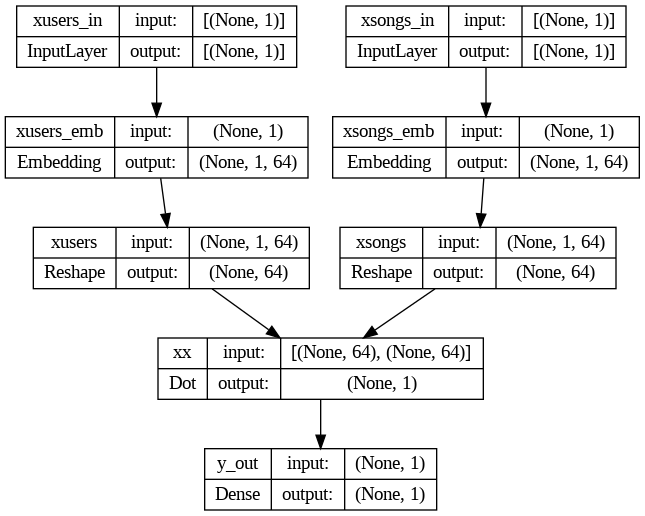

In [18]:
utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [19]:
def utils_plot_keras_training(training):
    metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

    ## training
    ax[0].set(title="Training")
    ax11 = ax[0].twinx()
    ax[0].plot(training.history['loss'], color='black')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax11.plot(training.history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')
    ax11.legend()

    ## validation
    ax[1].set(title="Validation")
    ax22 = ax[1].twinx()
    ax[1].plot(training.history['val_loss'], color='black')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax22.plot(training.history['val_'+metric], label=metric)
    ax22.set_ylabel("Score", color="steelblue")
    plt.show()

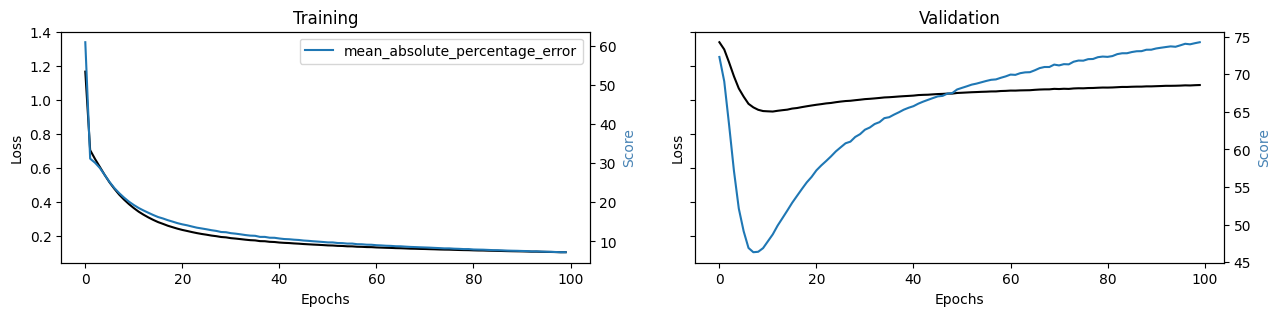

In [20]:
# train
training = model.fit(x=[train["user_id"], train["song_id"]], y=train["y"],
                     epochs=100, batch_size=128, shuffle=True, verbose=0, validation_split=0.3)
model = training.model
utils_plot_keras_training(training)

In [21]:
# test
test["y_pred"] = model.predict([test["user_id"], test["song_id"]])
test

768/768 [==============================] - 1s 2ms/step


,user_id,song_id,y,y_pred
0,0,460,1.0,3.133959
1,0,511,1.0,1.735523
2,1,469,1.0,1.944740
3,1,470,1.0,2.415410
4,1,481,1.0,0.504782
...,...,...,...,...
24557,3152,501,1.0,1.562805
24558,3152,515,2.0,0.356755
24559,3152,526,1.0,1.509942
24560,3153,488,2.0,1.342537


###### Evaluate

In [22]:
# overall
y_test = test["y"]
predicted = test["y_pred"]

print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.3f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", str(round(np.mean(np.abs((y_test-predicted)/predicted)), 2))+"%")

Mean Absolute Error (Σ|y-pred|/n): 1.096
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 4.33%


In [23]:
def mean_reciprocal_rank(y_test, predicted):
    score = []
    for product in y_test:
        mrr = 1 / (list(predicted).index(product) + 1) if product in predicted else 0
        score.append(mrr)
    return np.mean(score)


# single case
i = 1
print("--- user", i, "---")

top =10
y_test = test[test["user_id"]==i].sort_values("y", ascending=False)["song_id"].values[:top]
print("y_test:", y_test)

predicted = test[test["user_id"]==i].sort_values("y_pred", ascending=False)["song_id"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", round(mean_reciprocal_rank(y_test, predicted),2))

--- user 1 ---
y_test: [553 469 470 481 500 541 551]
predicted: [541 500 470 469 551 553 481]
true positive: 7 (70.0%)
accuracy: 14.3%
mrr: 0.37


#### Neural Collaborative Filtering

In [24]:
test = dtf_test.stack(dropna=True).reset_index().rename(columns={0:"y"})
test.head()

,user_id,song_id,y
0,0,460,1.0
1,0,511,1.0
2,1,469,1.0
3,1,470,1.0
4,1,481,1.0


###### Model Design

In [25]:
embeddings_size = 64
usr, prd = dtf_users.shape[0], dtf_users.shape[1]

# Input layer
xusers_in = layers.Input(name="xusers_in", shape=(1,))
xsongs_in = layers.Input(name="xsongs_in", shape=(1,))

# A) Matrix Factorization
## embeddings and reshape
cf_xusers_emb = layers.Embedding(name="cf_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
cf_xusers = layers.Reshape(name='cf_xusers', target_shape=(embeddings_size,))(cf_xusers_emb)
## embeddings and reshape
cf_xsongs_emb = layers.Embedding(name="cf_xsongs_emb", input_dim=prd, output_dim=embeddings_size)(xsongs_in)
cf_xsongs = layers.Reshape(name='cf_xsongs', target_shape=(embeddings_size,))(cf_xsongs_emb)
## product
cf_xx = layers.Dot(name='cf_xx', normalize=True, axes=1)([cf_xusers, cf_xsongs])

# B) Neural Network
## embeddings and reshape
nn_xusers_emb = layers.Embedding(name="nn_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
nn_xusers = layers.Reshape(name='nn_xusers', target_shape=(embeddings_size,))(nn_xusers_emb)
## embeddings and reshape
nn_xsongs_emb = layers.Embedding(name="nn_xsongs_emb", input_dim=prd, output_dim=embeddings_size)(xsongs_in)
nn_xsongs = layers.Reshape(name='nn_xsongs', target_shape=(embeddings_size,))(nn_xsongs_emb)
## concat and dense
nn_xx = layers.Concatenate()([nn_xusers, nn_xsongs])
nn_xx = layers.Dense(name="nn_xx", units=int(embeddings_size/2), activation='relu')(nn_xx)

# Merge A & B
y_out = layers.Concatenate()([cf_xx, nn_xx])
y_out = layers.Dense(name="y_out", units=1, activation='linear')(y_out)

# Compile
model = models.Model(inputs=[xusers_in,xsongs_in], outputs=y_out, name="Neural_CollaborativeFiltering")
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])
model.summary()

Model: "Neural_CollaborativeFiltering"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 xusers_in (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 xsongs_in (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 nn_xusers_emb (Embedding)   (None, 1, 64)                201920    ['xusers_in[0][0]']           
                                                                                                  
 nn_xsongs_emb (Embedding)   (None, 1, 64)                36032     ['xsongs_in[0][0]']           
                                                                      

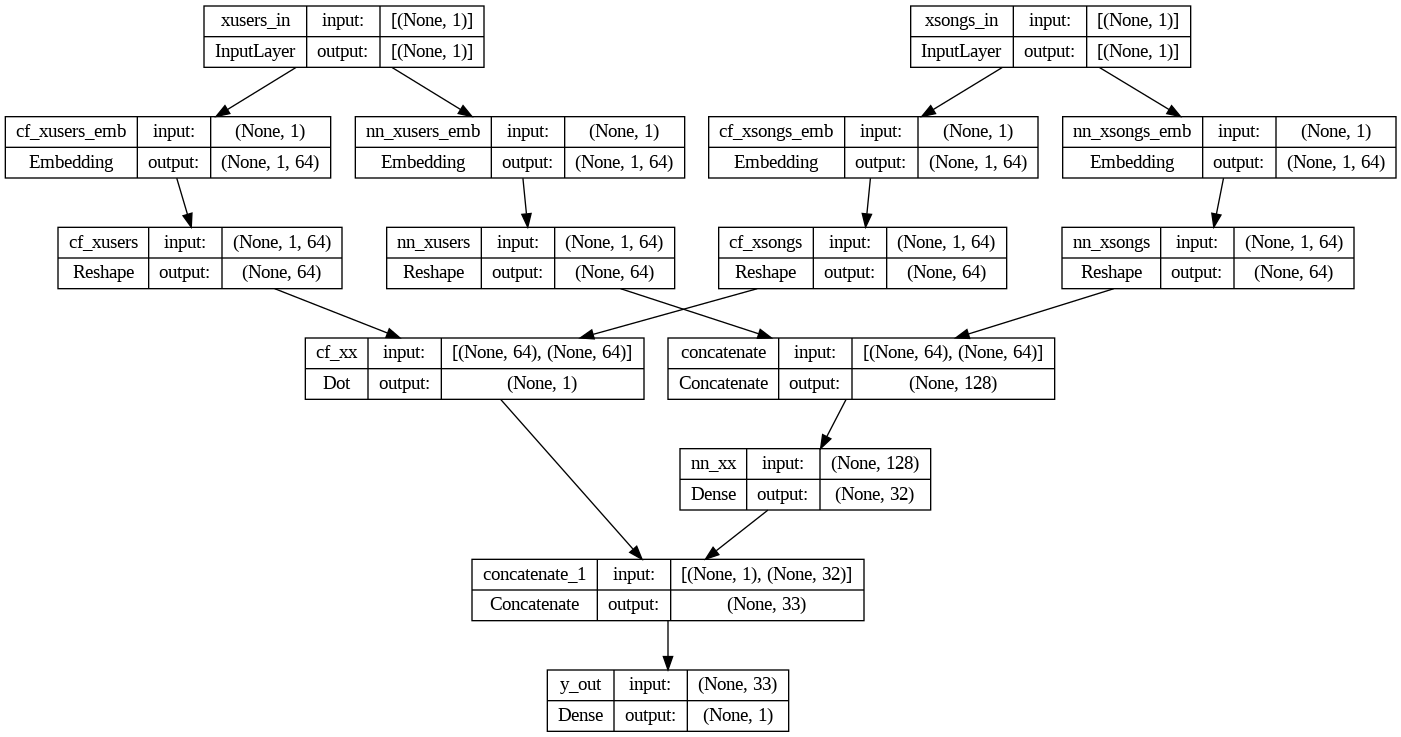

In [26]:
utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

###### Training and Testing

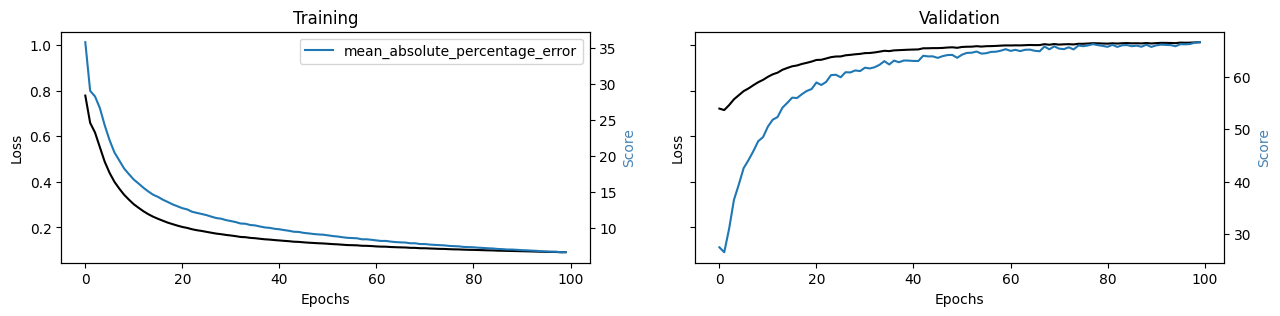

In [27]:
# train
training = model.fit(x=[train["user_id"], train["song_id"]], y=train["y"],
                     epochs=100, batch_size=128, shuffle=True, verbose=0, validation_split=0.3)
model = training.model
utils_plot_keras_training(training)

In [28]:
# test
test["y_pred"] = model.predict([test["user_id"], test["song_id"]])
test

768/768 [==============================] - 2s 2ms/step


,user_id,song_id,y,y_pred
0,0,460,1.0,1.599498
1,0,511,1.0,2.215031
2,1,469,1.0,1.952267
3,1,470,1.0,1.691682
4,1,481,1.0,-0.165508
...,...,...,...,...
24557,3152,501,1.0,3.525342
24558,3152,515,2.0,0.192849
24559,3152,526,1.0,0.386654
24560,3153,488,2.0,0.593994


###### Evaluate

In [29]:
# overall
y_test = test["y"]
predicted = test["y_pred"]

print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.3f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", str(round(np.mean(np.abs((y_test-predicted)/predicted)), 2))+"%")

Mean Absolute Error (Σ|y-pred|/n): 0.999
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 4.09%


In [30]:
# single case
i = 1
print("--- user", i, "---")

top = 10
y_test = test[test["user_id"]==i].sort_values("y", ascending=False)["song_id"].values[:top]
print("y_test:", y_test)

predicted = test[test["user_id"]==i].sort_values("y_pred", ascending=False)["song_id"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", round(mean_reciprocal_rank(y_test, predicted),2))

--- user 1 ---
y_test: [553 469 470 481 500 541 551]
predicted: [469 470 551 500 541 553 481]
true positive: 7 (70.0%)
accuracy: 0.0%
mrr: 0.37


## **Observations**

- We can see that a Neural Collaborative Filtering improves over the standar approach.
- We expect that as we add features as part of the Dense Neural Network model will provide better models. 